In [1]:
#!/usr/bin/env python
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import warnings
# @warnings.filterwarnings("ignore", category=LineSearchWarning)

from scipy.optimize.linesearch import LineSearchWarning



In [14]:
@ignore_warnings(category=ConvergenceWarning)
@ignore_warnings(category=LineSearchWarning)
def model(ratio,solver,max_iters):
    # Load training and testing data
    X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1) # each row is an observation with 6 features
    y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1] # each row corresponds to actual value of observation from ^

    # Set up the model
    print("---")
    print(max_iters)
    classification = LogisticRegression(random_state=None,solver=solver, max_iter=max_iters,fit_intercept=False)

    # Partition data into train and test
    train_x, cross_validation_x_data, train_y, cross_validation_actual_y_values = train_test_split(X_train, y_train, test_size=(1-ratio), random_state=0)

    # Train model
    classification.fit(train_x, train_y)

    # Test model
    test_y = classification.predict(cross_validation_x_data)
    
    return (classification, test_y, cross_validation_actual_y_values)

def evaluate(classification, predicted_y_values, actual_y_values):
    accuracy = accuracy_score(actual_y_values, predicted_y_values)
    sensitivity = recall_score(actual_y_values, predicted_y_values)
    specificity = 1
    roc_auc_score_value = roc_auc_score(actual_y_values, predicted_y_values)
    print("Accuracy Rate = " + str(accuracy))
    print("Sensitivity Rate = " + str(sensitivity))
    print("ROC AUC Score= " + str(roc_auc_score_value))
    return (accuracy, sensitivity, specificity, roc_auc_score_value)


start = 0.5
end=0.9
ratios = np.linspace(start,end,int((end-start)*100+1))
ratio=0.83


y_pred = []
max_roc = 0
max_sensitivity = 0

roc_values = []

#solvers = ['lbfgs', 'sag', 'saga','newton-cg','liblinear']
solver = 'newton-cg'

start = 60
end=100
range_size = 1
start_end = int((end-start)/range_size+1)

max_iters = np.linspace(start,end,start_end)
max_iters = [80]
for max_iter in max_iters:
    classification, test_y, cross_validation_actual_y_values = model(ratio,solver,max_iter)
    X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
    y_pred = classification.predict(X_test)
    negatives = np.sum(np.array(y_pred) < 0)
    print("Ratio: " + str(ratio))
    accuracy, sensitivity, specificity, roc_auc_score_value = evaluate(classification, test_y, cross_validation_actual_y_values)
    
    
    roc_values.append(roc_auc_score_value)



---
80
Ratio: 0.83
Accuracy Rate = 0.8857142857142857
Sensitivity Rate = 0.8947368421052632
ROC AUC Score= 0.8848684210526315


In [15]:
# Arrange answer in two columns. First column (with header "Id") is an
# enumeration from 0 to n-1, where n is the number of test points. Second
# column (with header "EpiOrStroma" is the predictions.
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")

# Note: fmt='%d' denotes that all values should be formatted as integers which
# is appropriate for classification. For regression, where the second column
# should be floating point, use fmt='%d,%f'.
    

Text(0, 0.5, 'ROC AUC Value')

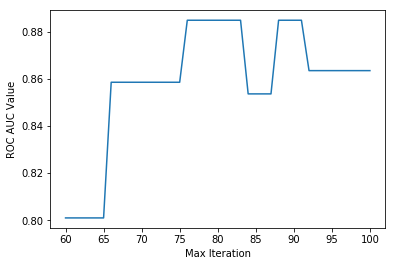

In [7]:
plt.plot(max_iters, roc_values)
plt.xlabel("Max Iteration")
plt.ylabel("ROC AUC Value")
    